In [10]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import sys

from clustpy.utils import plot_2d_data, plot_with_transformation


current_folder = globals()["_dh"][0]
sys.path.append(current_folder)

from data._settings import *
from data.densired_datasets import Datasets as DensiredDatasets
from data.real_world_datasets import Datasets as RealWorldDatasets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[(-1, 500), (0, 188), (1, 297), (2, 1009), (3, 15), (4, 375), (5, 500), (6, 294), (7, 1018), (8, 322), (9, 482)]


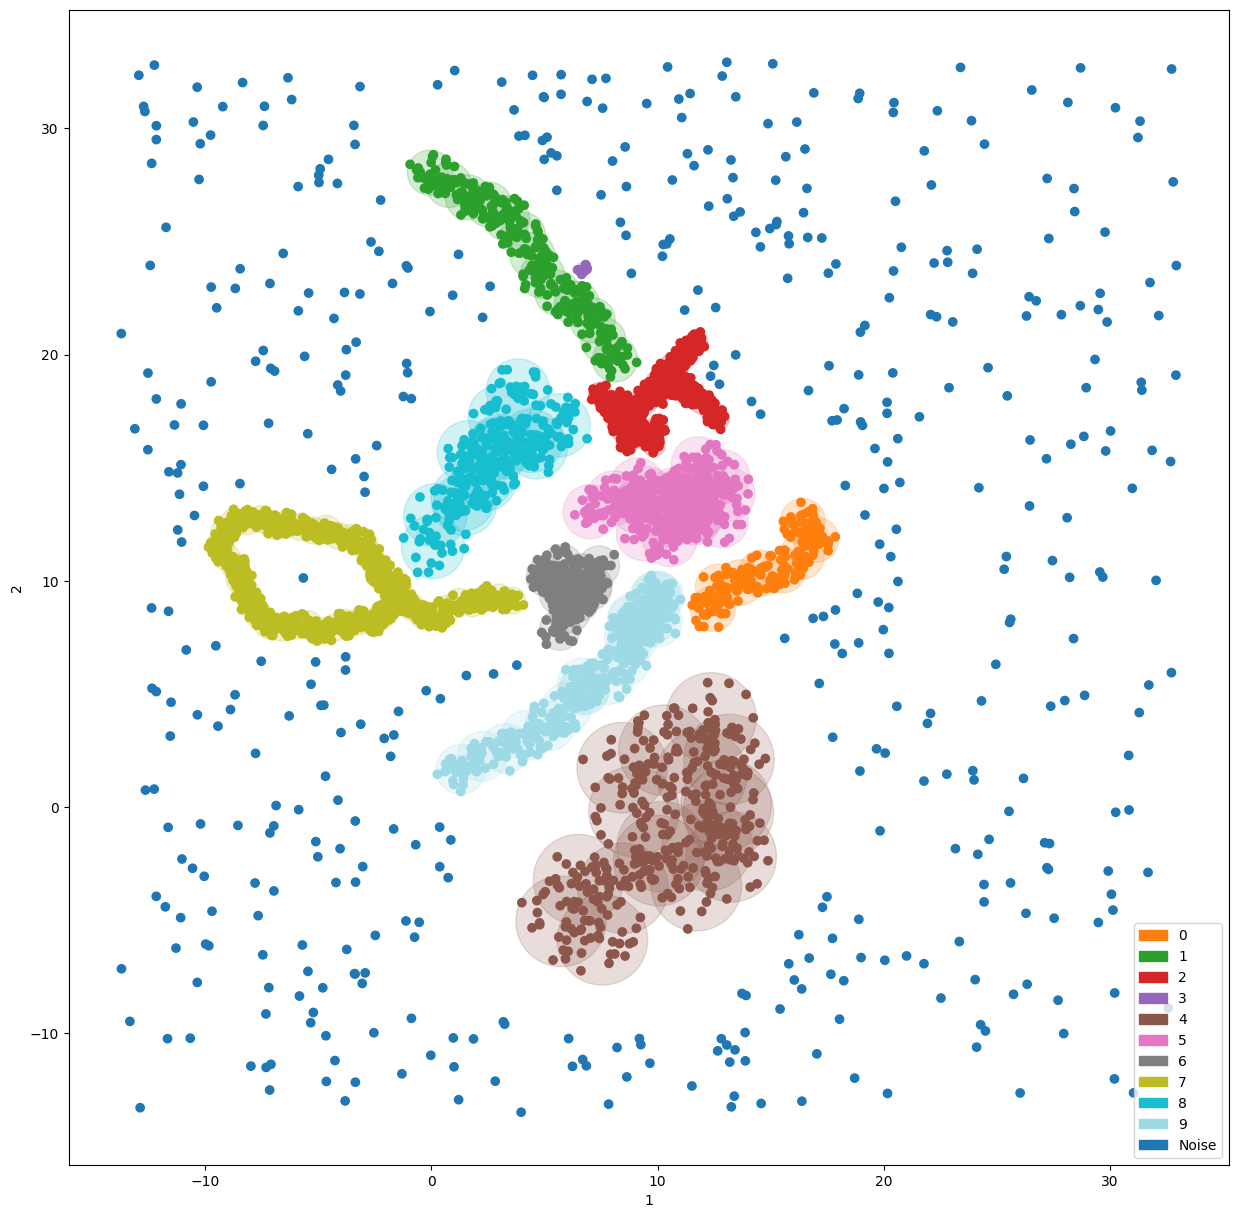

In [2]:
X, l, skeleton, data = DensiredDatasets.DatasetDensiredExample.original_data

print([(int(c_id), len(X[l == c_id])) for c_id in np.sort(list(set(l)))])
skeleton.verbose = True
skeleton.display_data(data, show_radius=True, show_core=False)

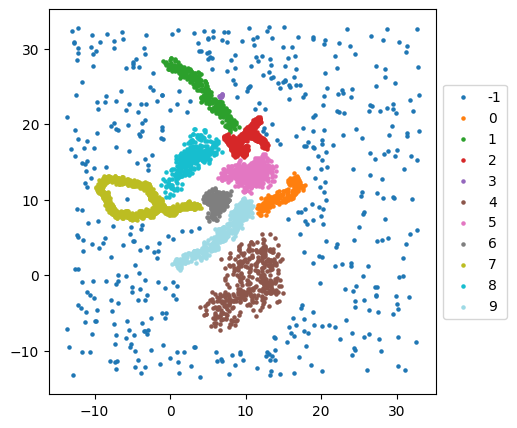

In [3]:
X, l = DensiredDatasets.DatasetDensiredExample.data

plt.figure(figsize=(5, 5))
color = plt.cm.tab20(np.linspace(0, 1, len(set(l))))
for c_id in np.sort(list(set(l))):
    plt.scatter(X[:, 0][l == c_id], X[:, 1][l == c_id], s=5, color=color[int(c_id) + 1], label=int(c_id))
legend = plt.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

Dataset1 : (0.923840339571931, 0.7730591278753104)


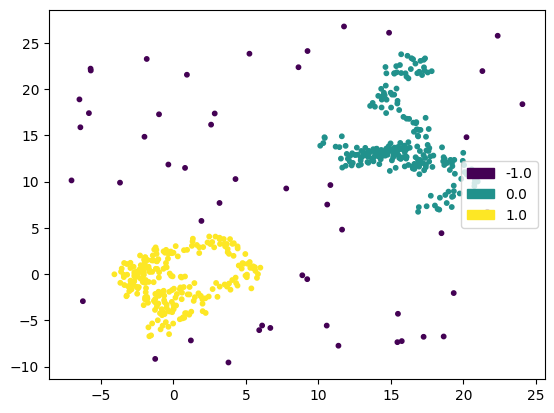

Dataset2 : (0.9282475250333941, 0.7575539627409738)


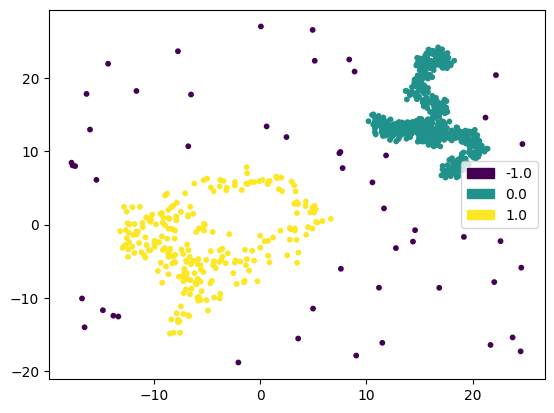

DatasetDensiredExample : (0.5311705301041396, 0.4092125037119206)


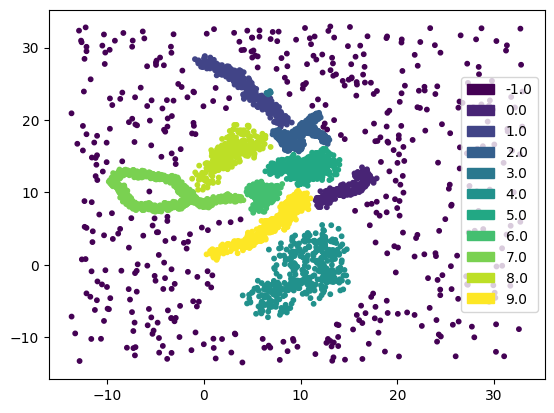


Finished.


In [11]:
for dataset in DensiredDatasets:
    print(dataset.name, ": ", end="")
    X, l = dataset.data
    eval_values = DISCO(X[l != -1], l[l != -1]), SILHOUETTE(X[l != -1], l[l != -1])
    print(eval_values)
    plot_2d_data(X, l)

print()
print("Finished.")